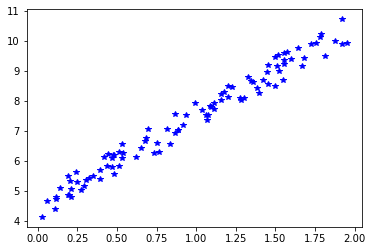

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.rand(100,1)
plt.plot(x,y,'b*')


In [2]:
x_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(x_b.T @ x_b)@ x_b.T @ y
theta_best

array([[4.47472254],
       [3.04012269]])

In [3]:
np.shape(x_b)

(100, 2)

In [4]:
np.shape(theta_best)

(2, 1)

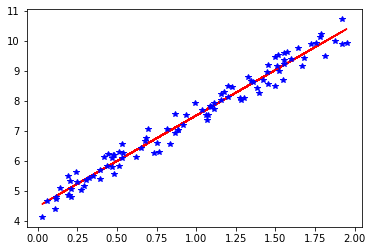

In [5]:
y_predict =x_b @ theta_best
plt.plot(x,y_predict,'r-')
plt.plot(x,y,'b*')

## Batch gradient descent

In [6]:
def batchgrd(eta,m=100,n_iterations=1000):
    theta = np.random.randn(2,1)
    for ii in range(n_iterations):
        gradient = 2/m*x_b.T@(x_b@theta-y)
        theta = theta-eta*gradient
    return theta
theta = np.ones((2,10))
for ii in range(10):
    theta[0:2,ii:ii+1] = batchgrd(0.1,100,ii)
theta

array([[-0.24954949,  2.05734418,  3.56539525,  4.45965209,  3.54938863,
         3.2171461 ,  3.52718209,  3.87066098,  2.31697477,  3.96430458],
       [ 1.05976277,  1.84311713,  1.69251721,  1.74360253,  3.03007022,
         3.62802034,  3.59853384,  3.3933902 ,  4.89617461,  3.43315387]])

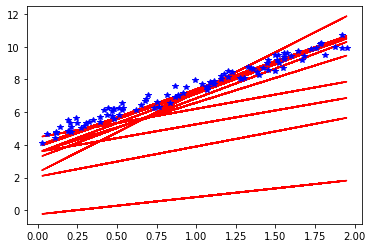

In [7]:
for ii in range(10):
    y_predict0 = x_b @ theta[0:2,ii:ii+1]
    plt.plot(x,y_predict0,'r-')
plt.plot(x,y,'b*')

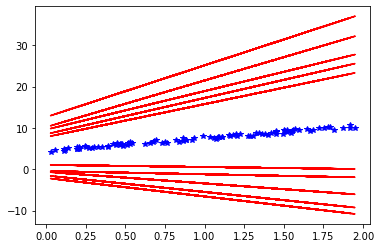

In [8]:
theta = np.ones((2,10))
for ii in range(10):
    theta[0:2,ii:ii+1] = batchgrd(0.5,100,ii)
for ii in range(10):
    y_predict0 = x_b @ theta[0:2,ii:ii+1]
    plt.plot(x,y_predict0,'r-')
plt.plot(x,y,'b*')

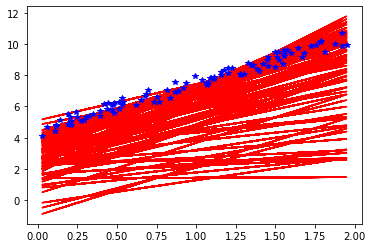

In [9]:
theta = np.ones((2,1000))
for ii in range(1000):
    theta[0:2,ii:ii+1] = batchgrd(0.01,100,ii)
for ii in range(100):
    y_predict0 = x_b @ theta[0:2,ii:ii+1]
    plt.plot(x,y_predict0,'r-')
plt.plot(x,y,'b*')

In [10]:
n_epochs = 50
t0,t1=5,50
theta = np.random.randn(2,1)
theta

array([[-0.4980645 ],
       [ 0.65152609]])

In [11]:
def learning_schedule(t):
    return t0/(t+t1)
m = 100
theta_set =[]
theta_set.append(theta)

In [12]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index =np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        err = xi@theta-yi
        gradients = 2*xi.T@err
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients
        theta_set.append(theta)
theta

array([[4.48829341],
       [3.04459037]])

In [13]:
theta_set[0]

array([[-0.4980645 ],
       [ 0.65152609]])

In [14]:
x_b.shape

(100, 2)

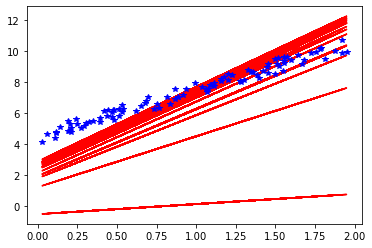

In [15]:
for ii in range(20):
    y_predict0 = x_b @ theta_set[ii]
    plt.plot(x,y_predict0,'r-')
plt.plot(x,y,'b*')

In [16]:
from sklearn.linear_model import SGDRegressor
sdg_reg = SGDRegressor(max_iter = 1000, tol = 1e-3,penalty = None, eta0 = 0.1)
sdg_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sdg_reg.intercept_

array([4.44185319])

In [18]:
sdg_reg.coef_

array([3.0551372])

Polynomial Regression

In [19]:
m = 100
x = 6*np.random.rand(m,1)-3
y = 0.5*x**2 + x+2+np.random.randn(m,1)


In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False)
x_poly = poly_features.fit_transform(x)

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.15402656]), array([[0.99447983, 0.48514776]]))

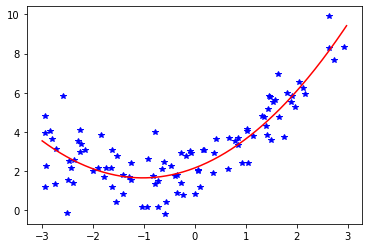

In [22]:
plt.plot(x,y,'b*')
x_raw = np.arange(-3,3,0.02)
y_raw = lin_reg.coef_[0][1]*x_raw**2+lin_reg.coef_[0][0]*x_raw+lin_reg.intercept_
plt.plot(x_raw,y_raw,'r-')

## Learning Curve
- Plots of the model performance on the training set and the validation set as a function of the training set size

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model,x,y):
    x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2)
    train_errors,val_errors = [],[]
    for m in range(1,len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')

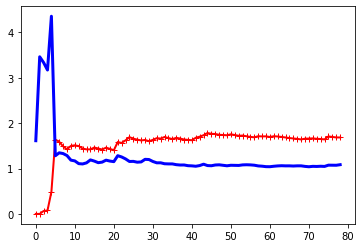

In [24]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,x,y)

- The abobe curve is typical learning curve of underfit. Both curves have reached a plateau; they are close and fairly high

In [25]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])

(0.0, 3.0)

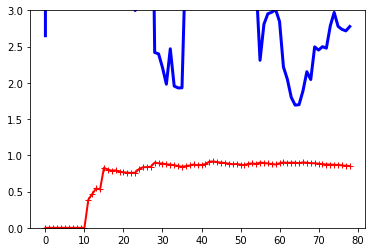

In [26]:
plot_learning_curves(polynomial_regression,x,y)
plt.ylim((0,3))

- Overfitting model
    - model perform better than on the validation set
    - larger training set could get two curves closer

## Regularized Models
### Ridge Regression

#### test data

In [27]:
np.random.seed(42)
m = 20
x = 3*np.random.rand(m,1)
y = 1+0.5*x+np.random.randn(m,1)/1.5
x_new = np.linspace(0,3,100).reshape(100,1)

In [28]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4,solver='auto')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[1.55237977]])

In [29]:
sgd_reg = SGDRegressor(alpha = 100,penalty='l2')
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([1.36637051])

In [30]:
def plotridge(x_train,y_train,x_val,alpha_in):
    ridge_reg = Ridge(alpha=alpha_in,solver='auto')
    ridge_reg.fit(x_train,y_train)
    y_predict = ridge_reg.predict(x_val)
    return y_predict

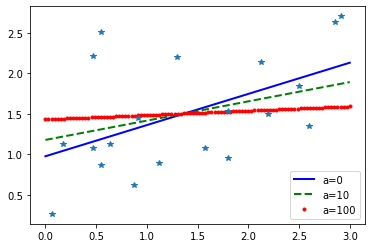

In [31]:
alpha = 0
y_predict1 = plotridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'b-',linewidth=2,label='a=%d' %alpha)
plt.legend()
alpha = 10
y_predict1 = plotridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'g--',linewidth=2,label='a=%d' %alpha)
plt.legend()
alpha = 100
y_predict1 = plotridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'r.',linewidth=2,label='a=%d' %alpha)
plt.legend()
plt.plot(x,y,'*')

In [32]:
from sklearn.preprocessing import StandardScaler
poly_regi_reg = Pipeline([
    ('polyfeatures',PolynomialFeatures(degree=10,include_bias=False)),
    ('scale',StandardScaler()),
    ('ridge_reg',Ridge(solver='auto'))
])
def plotpolyridge(x_train,y_train,x_val,alpha_in):
    poly_regi_reg.set_params(ridge_reg__alpha=alpha_in).fit(x_train,y_train)
    y_predict = poly_regi_reg.predict(x_val)
    return y_predict

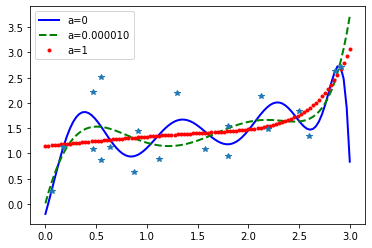

In [33]:
alpha = 0
y_predict1 = plotpolyridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'b-',linewidth=2,label='a=%d' %alpha)
plt.legend()
alpha = 1e-5
y_predict1 = plotpolyridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'g--',linewidth=2,label='a=%f' %alpha)
plt.legend()
alpha = 1
y_predict1 = plotpolyridge(x,y,x_new,alpha)
plt.plot(x_new,y_predict1,'r.',linewidth=2,label='a=%d' %alpha)
plt.legend()
plt.plot(x,y,'*')

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net
- a middle ground between Ridge Regression and Lasso
- Cost function is defined as $ J(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta})+r\alpha \sum_{i=1}^n |\theta_i|+\frac{1-r}{2}\alpha \sum_{i=1}^n \theta_i ^2$ 

In [35]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping
- Stopping training as soon as the validation error reaches minimum

In [36]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)


In [37]:
from copy import deepcopy
poly_scaler = Pipeline([("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
                        ("std_scaler",StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter =1,tol = -np.infty,warm_start=True,penalty = None,learning_rate = "constant",eta0 = 0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [38]:
best_model,best_epoch

(SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=-inf, warm_start=True),
 243)

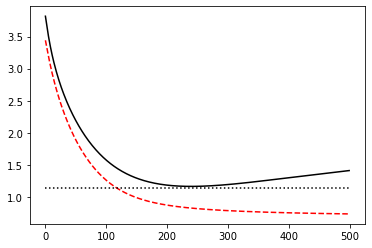

In [39]:
sgd_reg = SGDRegressor(max_iter =1,tol = -np.infty,warm_start=True,penalty = None,learning_rate = "constant",eta0 = 0.0005,random_state=42)
num_epoch = 500
val_err = []
train_err = []

for epoch in range(num_epoch):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_err.append(mean_squared_error(y_val,y_val_predict))
    train_err.append(mean_squared_error(y_train,y_train_predict))
best_val_epoch = np.argmin(val_err)
best_val_rmse = np.sqrt(val_err[best_val_epoch])
best_val_rmse = best_val_rmse-0.03
plt.plot(np.sqrt(val_err),'k-')
plt.plot(np.sqrt(train_err),'r--')
plt.plot([0,num_epoch],[best_val_rmse,best_val_rmse],'k:')


## Logistic Regression
- For 2-class classification
- Assumption:
    - $ \text{p}(y=1|\theta,x) = h(\theta^Tx)=\frac{1}{1+e^{-\theta^T x}}$
    - likelihood $ \text{p}(y|\theta,x)= h(\theta^T x)^y(1-h(\theta^T x))^{(1-y)}$
    - Consider the partitial derivative of the log-likelihood function respect to the $j$th model parameter
    \begin{equation}
    \frac{\partial I(\theta)}{\partial \theta_j}= \frac{1}{m}\sum_{i=1}^{m}(h(\theta^T)-y^{(i)})x_j^{(i)}
    \end{equation}

In [40]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [41]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [42]:
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(int)


In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

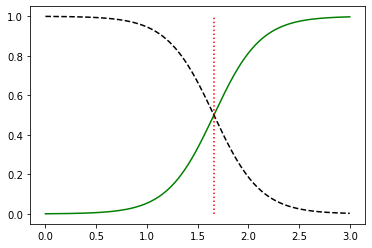

In [44]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris virginica")
plt.plot(X_new,y_proba[:,0],"k--",label="Not Iris virginica")
ind = np.argmin(np.abs(y_proba[:,1]-0.5))
X_new[ind]
y_proba[ind,1]
plt.plot([X_new[ind],X_new[ind]],[0,1],'r:')

In [45]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [46]:
XX = iris["data"][:,2:4]
XX

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [47]:
log_reg = LogisticRegression()
log_reg.fit(XX,y)
deccoeff = log_reg.coef_
decintercept = log_reg.intercept_

decintercept

array([-17.5481106])

In [48]:
deccoeff

array([[2.77762524, 2.38552012]])

### skit-learn logistic regression model 
- The model is linear model: $ \mathbf{a}^T \mathbf{x}+b$
- The model estimates the log-likelihood ratio: $ ln(\frac{P(y=1)}{P(y=0)})$
- The model coefficients is returned in *coeff_*
- The bias is returned in *intercept_*
- The bias is calculated for **50%** 
  

In [49]:
model_coeff = deccoeff
model_bias = decintercept
model_coeff[:,0]


array([2.77762524])

In [50]:
predict_coeff = -model_coeff[:,0]/model_coeff[:,1]
predict_bias = -model_bias/model_coeff[:,1]

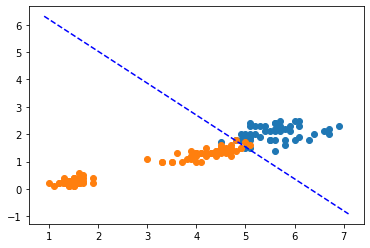

In [51]:
ind0 = np.argwhere(y==1)

plt.scatter(XX[ind0,0],XX[ind0,1])

ind1 = np.argwhere(y==0)

plt.scatter(XX[ind1,0],XX[ind1,1])
xin = np.linspace(0.9,7.1,2000)
yout = predict_coeff*xin+predict_bias
plt.plot(xin,yout,'b--')

**Remark**: if the log likelihood to be $ q $, we have to update the *intercept_* as *intercept_ += q*. 

In [52]:
prob_1 = 0.8
lratio = np.log(prob_1)/np.log(1-prob_1)
model_bias = model_bias + lratio
predict_coeff_0_8 = -model_coeff[:,0]/model_coeff[:,1]
predict_bias_0_8 = -model_bias/model_coeff[:,1]


(3.0, 7.0)

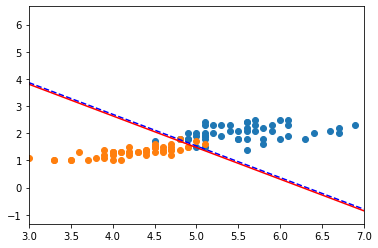

In [53]:
ind0 = np.argwhere(y==1)

plt.scatter(XX[ind0,0],XX[ind0,1])

ind1 = np.argwhere(y==0)

plt.scatter(XX[ind1,0],XX[ind1,1])
xin = np.linspace(0.9,7.1,2000)
yout = predict_coeff*xin+predict_bias
plt.plot(xin,yout,'b--')
yout_0_8 = predict_coeff_0_8*xin+predict_bias_0_8
plt.plot(xin,yout_0_8,'r-')
plt.xlim([3,7])

## Softmax Regression
- Model: the softmax score for class k is a linear model which is $ s_k(\mathbf{x} ) = \left( \mathbf{\theta}^{(k)} \right)^T \mathbf{x} $
- Mapping to probability:  $ \hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \dfrac{\text{exp}\left( s_k(\mathbf{x}) \right)}{\sum_{j=1}^K\text{exp}\left( s_j(\mathbf{x}) \right)}$
- Decision making: $ \hat{y} = \underset{k}{\text{argmax}} \; \; \sigma(\mathbf{s}(\mathbf{x}))_k$
- Cost function: cross entropy  $ J(\mathbf{\Theta}) = -\frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K}y_k^{(i)}\text{log}\left( \hat{p}_k^{(i)} \right)$
  - $ y_k^{(i)} $ is the probability that the $i^{th} $ instance belongs to class $k$ 
- Gradient vector for class $k$: $\nabla_{\mathbf{\theta}^{(k)}}J(\mathbf{\Theta}) = \frac{1}{m}\sum \limits_{i=1}^m \left( \hat{p}_k^{(i)-y_k^{(i)}} \right)\mathbf{x}^{(i)}$

In [54]:
X= iris["data"][:,(2,3)]
y = iris["target"]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

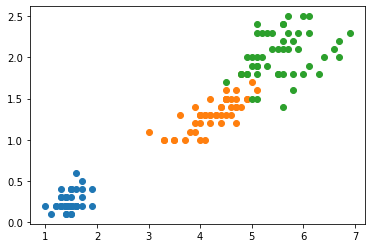

In [55]:
ind0 = np.argwhere(y==0)
plt.scatter(X[ind0,0],X[ind0,1])
ind1 = np.argwhere(y==1)
plt.scatter(X[ind1,0],X[ind1,1])
ind2 = np.argwhere(y==2)
plt.scatter(X[ind2,0],X[ind2,1])

In [56]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver = "lbfgs",C=10 )
softmax_reg.fit(X,y)
model_coeff_multi = softmax_reg.coef_
model_coeff_multi

array([[-4.58614563, -2.24129385],
       [ 0.16068263, -2.15860167],
       [ 4.425463  ,  4.39989552]])

In [57]:
model_coeff_multi[1,0]

0.16068263052705914

In [58]:
model_intercept_multi = softmax_reg.intercept_
model_intercept_multi

array([ 18.87514796,   6.3844344 , -25.25958236])

In [59]:
softmax_reg.predict([[5,2]])


array([2])

In [60]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

(0.0, 7.0, 0.0, 3.5)

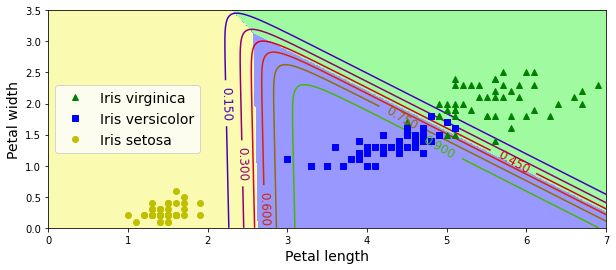

In [61]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])


## Exercises:
1. stochastic gradient descent or mini-batch gradient descent
2. the gradient descent algorithm could be affected by having low convergence rate; we can sclae the the training set by using *standard scaling*
3. No, the cost-function is convex
4. If the cost function is convex and the learning rate is appropriate, then the gradient descent algorithm should get similar model. But the mini-batch and stochastic gradient descent would jump around the minimum.
5. The model might be overfit and early stop strategy might be used.
6. For stochastic and mini-batch gradient descent, the learning curve is not so smooth. One solution is to stop only after validation error is above the minimum for some time and roll back then to find the minimum. 